In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

from calc_Dilution import basicDeltaOperations as op

In [2]:
with open('45k_Data.json') as f:
    neg45k = json.load(f)

with open('EA_IRMS_Data.json') as f:
    EAData = json.load(f)

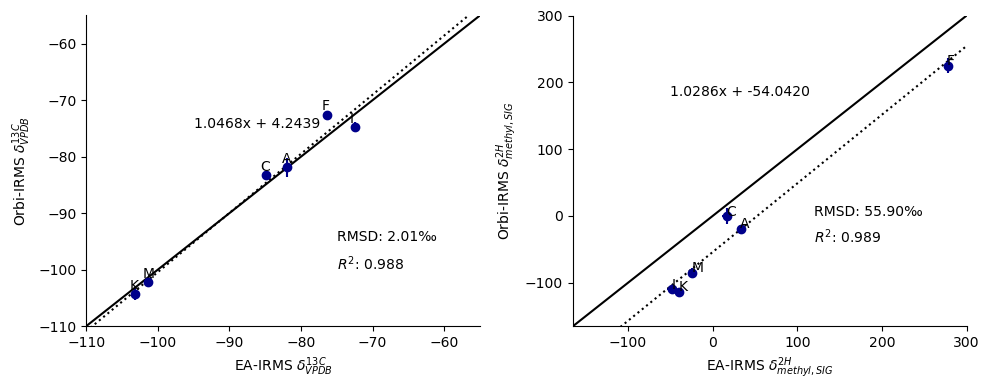

In [3]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Caltech 2023']
yDict = neg45k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG','ARC','BTC','THR1','THR2','AA']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = yDict[MPAKey]['13C/Unsub']['ER']

        cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-95, -75, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG','ARC','BTC','THR1','THR2','AA']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 4/3 * deltaOrbi
        deltaOrbiErrScaled = 4/3 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        crossPlot[MPAKey]['2H'] = deltaOrbiScaled
        crossPlot[MPAKey]['2HErr'] = deltaOrbiErrScaled

        cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-165,300)
cAx.set_ylim(-165,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()